# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudulent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [1]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_init = pd.read_csv("../raw_data/fraudTrain.csv")
data_init.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

## Cleaning inspired by another notebook

👇 Check class balance.

In [2]:
#data=data_init.sample(frac=0.1)
data=data_init

In [3]:
data.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [4]:
# DEFINING THE TARGET
y = data['is_fraud'] # the price here is either expensive or cheap

# DEFINING THE FEATURES
X = data.drop(columns=['is_fraud'])

In [5]:
X.drop(columns=['Unnamed: 0','unix_time','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'city_pop', 'trans_num'],inplace=True)
X.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,job,dob,merch_lat,merch_long
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,"Psychologist, counselling",1988-03-09,36.011293,-82.048315
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,Special educational needs teacher,1978-06-21,49.159047,-118.186462
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,Nature conservation officer,1962-01-19,43.150704,-112.154481
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,Patent attorney,1967-01-12,47.034331,-112.561071
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459


In [6]:
import datetime
X['dob'] = pd.to_datetime(X['dob'])
X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
X.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
gender                           object
lat                             float64
long                            float64
job                              object
dob                      datetime64[ns]
merch_lat                       float64
merch_long                      float64
dtype: object

In [7]:
X.drop(columns=['job','merchant'],inplace=True)
X.head()

,trans_date_trans_time,category,amt,gender,lat,long,dob,merch_lat,merch_long
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,1988-03-09,36.011293,-82.048315
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,1978-06-21,49.159047,-118.186462
2,2019-01-01 00:00:51,entertainment,220.11,M,42.1808,-112.2620,1962-01-19,43.150704,-112.154481
3,2019-01-01 00:01:16,gas_transport,45.00,M,46.2306,-112.1138,1967-01-12,47.034331,-112.561071
4,2019-01-01 00:03:06,misc_pos,41.96,M,38.4207,-79.4629,1986-03-28,38.674999,-78.632459


In [8]:
X['age'] = (X['trans_date_trans_time'] - X['dob']).dt.days / 365.25
X['trans_month']=pd.to_datetime(X['trans_date_trans_time']).dt.month
X['trans_day']=pd.to_datetime(X['trans_date_trans_time']).dt.day
X['trans_hour']=pd.to_datetime(X['trans_date_trans_time']).dt.hour
X.tail(5)

,trans_date_trans_time,category,amt,gender,lat,long,dob,merch_lat,merch_long,age,trans_month,trans_day,trans_hour
1296670,2020-06-21 12:12:08,entertainment,15.56,M,37.7175,-112.4777,1961-11-24,36.841266,-111.690765,58.573580,6,21,12
1296671,2020-06-21 12:12:19,food_dining,51.70,M,39.2667,-77.5101,1979-12-11,38.906881,-78.246528,40.528405,6,21,12
1296672,2020-06-21 12:12:32,food_dining,105.93,M,32.9396,-105.8189,1967-08-30,33.619513,-105.130529,52.810404,6,21,12
1296673,2020-06-21 12:13:36,food_dining,74.90,M,43.3526,-102.5411,1980-08-18,42.788940,-103.241160,39.841205,6,21,12
1296674,2020-06-21 12:13:37,food_dining,4.30,M,45.8433,-113.8748,1995-08-16,46.565983,-114.186110,24.848734,6,21,12


In [9]:
X.drop(columns=['trans_date_trans_time','dob'],inplace=True)
X.head()

,category,amt,gender,lat,long,merch_lat,merch_long,age,trans_month,trans_day,trans_hour
0,misc_net,4.97,F,36.0788,-81.1781,36.011293,-82.048315,30.814511,1,1,0
1,grocery_pos,107.23,F,48.8878,-118.2105,49.159047,-118.186462,40.531143,1,1,0
2,entertainment,220.11,M,42.1808,-112.2620,43.150704,-112.154481,56.950034,1,1,0
3,gas_transport,45.00,M,46.2306,-112.1138,47.034331,-112.561071,51.969884,1,1,0
4,misc_pos,41.96,M,38.4207,-79.4629,38.674999,-78.632459,32.763860,1,1,0


In [10]:
#Use cyclic (sin/cos) encoding for month, day, weekday
X["trans_month_sin"] = np.sin(2 * np.pi * X["trans_month"] / 12)
X["trans_month_cos"] = np.cos(2 * np.pi * X["trans_month"] / 12)

X["trans_day_sin"] = np.sin(2 * np.pi * X["trans_day"] / 31)
X["trans_day_cos"] = np.cos(2 * np.pi * X["trans_day"] / 31)

X["trans_hour_sin"] = np.sin(2 * np.pi * X["trans_hour"] / 24)
X["trans_hour_cos"] = np.cos(2 * np.pi * X["trans_hour"] / 24)

In [11]:
#Drop'trans_month','trans_day','trans_hour'
X.drop(columns=['trans_month','trans_day','trans_hour'],inplace=True)

In [12]:
X.head()

,category,amt,gender,lat,long,merch_lat,merch_long,age,trans_month_sin,trans_month_cos,trans_day_sin,trans_day_cos,trans_hour_sin,trans_hour_cos
0,misc_net,4.97,F,36.0788,-81.1781,36.011293,-82.048315,30.814511,0.5,0.866025,0.201299,0.97953,0.0,1.0
1,grocery_pos,107.23,F,48.8878,-118.2105,49.159047,-118.186462,40.531143,0.5,0.866025,0.201299,0.97953,0.0,1.0
2,entertainment,220.11,M,42.1808,-112.2620,43.150704,-112.154481,56.950034,0.5,0.866025,0.201299,0.97953,0.0,1.0
3,gas_transport,45.00,M,46.2306,-112.1138,47.034331,-112.561071,51.969884,0.5,0.866025,0.201299,0.97953,0.0,1.0
4,misc_pos,41.96,M,38.4207,-79.4629,38.674999,-78.632459,32.763860,0.5,0.866025,0.201299,0.97953,0.0,1.0


## My Tests

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)

## 1. Baseline

In [14]:
#Calculation of baseline
y_baseline=np.zeros(y_test.shape)
y_baseline

array([0., 0., 0., ..., 0., 0., 0.], shape=(259335,))

In [15]:
#Baseline score 1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
# Accuracy
acc = accuracy_score(y_test, y_baseline)
print("Accuracy:", acc)

# Precision (binary)
prec = precision_score(y_test, y_baseline)
print("Precision:", prec)

# Recall
rec = recall_score(y_test, y_baseline)
print("Recall:", rec)

# F1 score cannot be calculated cause Precision and Recall are equal to 0
#f1 = f1_score(y_test, y_baseline)
#print("F1 Score:", f1)

Accuracy: 0.9942121194593865
Precision: 0.0
Recall: 0.0


/home/shailendra/.pyenv/versions/3.10.6/envs/Project-AI-Financial-Risk-Management/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [16]:
#Baseline score 1
#y_baseline_prob=y_baseline
y_baseline_prob = y_baseline
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_baseline_prob)
print("ROC-AUC:", roc_auc)

# Precision-Recall AUC
pr_auc = average_precision_score(y_test, y_baseline_prob)
print("PR-AUC:", pr_auc)

ROC-AUC: 0.5
PR-AUC: 0.005787880540613492


## 2. CatBoost without tuning

In [17]:
from catboost import CatBoostClassifier
categorical_features = ['category','gender']
model = CatBoostClassifier(scale_pos_weight=99.39)


In [18]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#scoring = {'pr_auc': 'average_precision'}
#cv_scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
#cv_scores

In [19]:
#cv_scores['test_pr_auc'].mean()

In [20]:
from sklearn.metrics import classification_report
model.fit(X_train, y_train, cat_features=categorical_features, verbose=0)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.71      0.95      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.85      0.97      0.90    259335
weighted avg       1.00      1.00      1.00    259335



In [21]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])
confusion_matrix

predicted,0,1
actual,,
0,257246,588
1,81,1420


In [22]:
#Score
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Precision (binary)
prec = precision_score(y_test, y_pred)
print("Precision:", prec)

# Recall
rec = recall_score(y_test, y_pred)
print("Recall:", rec)

Accuracy: 0.9974203250621783
Precision: 0.7071713147410359
Recall: 0.9460359760159893


In [23]:
# Precision-Recall AUC
y_pred_prob= model.predict_proba(X_test)[:,1]
pr_auc = average_precision_score(y_test, y_pred_prob)
print("PR-AUC:", pr_auc)

PR-AUC: 0.9545343020112921


### Calibration WE will see this part later

In [24]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
calibrated_clf = CalibratedClassifierCV(model, cv=cv)
calibrated_clf.fit(X_train, y_train, cat_features=categorical_features, verbose=0)
y_pred_calibrated=calibrated_clf.predict(X_test)
print(classification_report(y_test, y_pred_calibrated))

NameError: name 'cv' is not defined

In [ ]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred_calibrated}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])
confusion_matrix

### Below we see that calibration impact a bit accuracy, precision and recall score

In [ ]:
#Score
# Accuracy
acc = accuracy_score(y_test, y_pred_calibrated)
print("Accuracy:", acc)

# Precision (binary)
prec = precision_score(y_test, y_pred_calibrated)
print("Precision:", prec)

# Recall
rec = recall_score(y_test, y_pred_calibrated)
print("Recall:", rec)

In [ ]:
# Precision-Recall AUC
y_pred_calibrated_prob= calibrated_clf.predict_proba(X_test)[:,1]
pr_auc = average_precision_score(y_test, y_pred_calibrated_prob)
print("PR-AUC:", pr_auc)

## 3. No tuning. After investigation and testing with first datas, we saw that default values for RandomForestClassifier where often optimal.

### Threshold ajustment

In [32]:
#We use threshold 0.5 for now
y_pred_cal = (y_pred_calibrated_prob >= 0.5).astype(int)
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred_cal}) #Store results in a dataframe

confusion_matrix_cal = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])
confusion_matrix_cal

predicted,0,1
actual,,
0,257764,70
1,309,1192


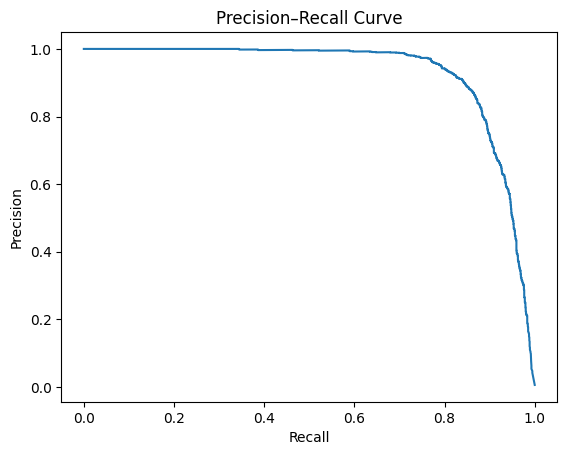

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_calibrated_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

In [41]:
#Make final predictions using an optimal threshold (we do optimization manually)
threshold_opt=0.01
y_pred_final = (y_pred_calibrated_prob >= threshold_opt).astype(int)
print("\nFinal Precision:", precision_score(y_test, y_pred_final))
print("Final Recall:", recall_score(y_test, y_pred_final))
print("Final F1:", f1_score(y_test, y_pred_final))


Final Precision: 0.7577464788732394
Final Recall: 0.8960692871419054
Final F1: 0.8211233211233211


In [42]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred_final}) #Store results in a dataframe

confusion_matrix_final = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])
confusion_matrix_final

predicted,0,1
actual,,
0,257404,430
1,156,1345


In [ ]:
## End